## 21.2 n-gram モデル

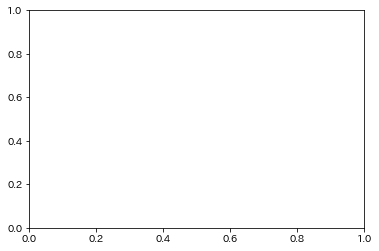

In [29]:
import random

import matplotlib.pyplot as plt
plt.gca().clear()

data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

In [30]:
from matplotlib import pyplot as plt

def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

In [31]:
import re
from bs4 import BeautifulSoup
import requests

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

# content = soup.find("div", "article-body")   # find article-body div
# 本多注... ページの構造が変わっているため、修正が必要。
content = soup.find("div", "main-post-radar-content")

regex = r"[\w']+|[\.]"                       # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [32]:
document

['Weâ',
 've',
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 'Oâ',
 'Reilly',
 'said',
 'that',
 'â',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'â',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'â',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'Join',
 'the',
 "O'Reilly",
 'online',
 'learning',
 'platform',
 '.',
 'Get',
 'a',
 'free',
 'trial',
 'today',
 'and',
 'find',
 'answers',
 'on',
 'the',
 'fly',
 'or',
 'master',
 'something',
 'new',
 'and',
 'useful',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'â',
 'data',
 'driven',
 'apps',
 '

In [33]:
len(document)

5225

参考サイト  
* N-gramの作り方  
https://qiita.com/kazmaw/items/4df328cba6429ec210fb

In [34]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
    print(prev, current)
    transitions[prev].append(current)

Weâ ve
ve all
all heard
heard it
it according
according to
to Hal
Hal Varian
Varian statistics
statistics is
is the
the next
next sexy
sexy job
job .
. Five
Five years
years ago
ago in
in What
What is
is Web
Web 2
2 .
. 0
0 Tim
Tim Oâ
Oâ Reilly
Reilly said
said that
that â
â data
data is
is the
the next
next Intel
Intel Inside
Inside .
. â
â But
But what
what does
does that
that statement
statement mean
mean Why
Why do
do we
we suddenly
suddenly care
care about
about statistics
statistics and
and about
about data
data In
In this
this post
post I
I examine
examine the
the many
many sides
sides of
of data
data science
science â
â the
the technologies
technologies the
the companies
companies and
and the
the unique
unique skill
skill sets
sets .
. Join
Join the
the O'Reilly
O'Reilly online
online learning
learning platform
platform .
. Get
Get a
a free
free trial
trial today
today and
and find
find answers
answers on
on the
the fly
fly or
or master
master something
something new
new and
an

HTML with
with tools
tools like
like Beautiful
Beautiful Soup
Soup natural
natural language
language processing
processing to
to parse
parse plain
plain text
text in
in English
English and
and other
other languages
languages or
or even
even getting
getting humans
humans to
to do
do the
the dirty
dirty work
work .
. Youâ
Youâ re
re likely
likely to
to be
be dealing
dealing with
with an
an array
array of
of data
data sources
sources all
all in
in different
different forms
forms .
. It
It would
would be
be nice
nice if
if there
there was
was a
a standard
standard set
set of
of tools
tools to
to do
do the
the job
job but
but there
there isnâ
isnâ t
t .
. To
To do
do data
data conditioning
conditioning you
you have
have to
to be
be ready
ready for
for whatever
whatever comes
comes and
and be
be willing
willing to
to use
use anything
anything from
from ancient
ancient Unix
Unix utilities
utilities such
such as
as awk
awk to
to XML
XML parsers
parsers and
and machine
machine learning
learning

turn around
around times
times .
. If
If you
you start
start a
a calculation
calculation it
it might
might not
not finish
finish for
for hours
hours or
or even
even days
days .
. But
But Hadoop
Hadoop and
and particularly
particularly Elastic
Elastic MapReduce
MapReduce make
make it
it easy
easy to
to build
build clusters
clusters that
that can
can perform
perform computations
computations on
on long
long datasets
datasets quickly
quickly .
. Faster
Faster computations
computations make
make it
it easier
easier to
to test
test different
different assumptions
assumptions different
different datasets
datasets and
and different
different algorithms
algorithms .
. Itâ
Itâ s
s easer
easer to
to consult
consult with
with clients
clients to
to figure
figure out
out whether
whether youâ
youâ re
re asking
asking the
the right
right questions
questions and
and itâ
itâ s
s possible
possible to
to pursue
pursue intriguing
intriguing possibilities
possibilities that
that youâ
youâ d
d otherwise
oth

huge mountain
mountain of
of data
data all
all at
at once
once .
. This
This is
is the
the heart
heart of
of what
what Patil
Patil calls
calls â
â data
data jiujitsuâ
jiujitsuâ â
â using
using smaller
smaller auxiliary
auxiliary problems
problems to
to solve
solve a
a large
large difficult
difficult problem
problem that
that appears
appears intractable
intractable .
. CDDB
CDDB is
is a
a great
great example
example of
of data
data jiujitsu
jiujitsu identifying
identifying music
music by
by analyzing
analyzing an
an audio
audio stream
stream directly
directly is
is a
a very
very difficult
difficult problem
problem though
though not
not unsolvable
unsolvable â
â see
see midomi
midomi for
for example
example .
. But
But the
the CDDB
CDDB staff
staff used
used data
data creatively
creatively to
to solve
solve a
a much
much more
more tractable
tractable problem
problem that
that gave
gave them
them the
the same
same result
result .
. Computing
Computing a
a signature
signature based
based o

In [35]:
transitions

defaultdict(list,
            {'Weâ': ['ve', 're', 've', 're', 've'],
             've': ['all',
              'ever',
              'taken',
              'made',
              'seen',
              'ever',
              'parsed',
              'all',
              'heard',
              'analyzed',
              'seen',
              'collected',
              'all',
              'gotten',
              'just'],
             'all': ['heard',
              'the',
              'of',
              'of',
              'carefully',
              'the',
              'in',
              'equipment',
              'youâ',
              'heard',
              'data',
              'of',
              'heard',
              'locked',
              'at',
              'trying',
              'aspects',
              'tapped',
              'The'],
             'heard': ['it', 'a', 'â', 'the'],
             'it': ['according',
              'to',
              'does',
              'to',
    

In [36]:
type(transitions)

collections.defaultdict

In [37]:
transitions.items()

dict_items([('Weâ', ['ve', 're', 've', 're', 've']), ('ve', ['all', 'ever', 'taken', 'made', 'seen', 'ever', 'parsed', 'all', 'heard', 'analyzed', 'seen', 'collected', 'all', 'gotten', 'just']), ('all', ['heard', 'the', 'of', 'of', 'carefully', 'the', 'in', 'equipment', 'youâ', 'heard', 'data', 'of', 'heard', 'locked', 'at', 'trying', 'aspects', 'tapped', 'The']), ('heard', ['it', 'a', 'â', 'the']), ('it', ['according', 'to', 'does', 'to', 'to', '.', 'into', 'tell', 'comes', 'and', 'goes', 'possible', 'and', '.', '.', 'well', 'simpler', 'necessary', 'and', 'onto', 'much', '.', 'might', 'easy', 'easier', 'arrives', 'takes', 'complements', 'comes', '.', '.', 'up', '.', 'look', 'involves', 'isnâ', 'tell', 'started', 'was', '.', 'â', 'all', 'to', 'to', 'to', 'to', 'â', 'appears']), ('according', ['to']), ('to', ['Hal', 'a', 'a', 'rip', 'CDDB', 'use', 'suggest', 'create', 'drive', 'use', 'the', 'do', 'mashup', 'convert', 'latitude', 'place', 'attract', 'use', 'others', 'see', 'many', 'updat

In [38]:
# bi-gramモデルで作る作文（意味不明だけど、それっぽいテキスト）

def generate_using_bigrams() -> str:
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

In [39]:
generate_using_bigrams()

'To understand what might be widely applicable to update and presenting that data as it all trying to use and come about web server logs from viewing a thousand data that sounds like .'

In [40]:
# tri-gramモデルで作る作文（意味不明だけど、bi-gramよりさらにそれっぽいテキスト）

trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

def generate_using_trigrams() -> str:
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return " ".join(result)

In [41]:
generate_using_trigrams()

'Factual enlists users to update and improve its datasets which cover topics as diverse as endocrinologists to hiking trails .'

## 21.3 文法

In [42]:
from typing import List, Dict

# Type alias to refer to grammars later
Grammar = Dict[str, List[str]]

grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

In [44]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"

def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        # If this is a terminal token, skip it.
        if is_terminal(token): continue

        # Otherwise, it's a non-terminal token,
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            # Replacement could be e.g. "_NP _VP", so we need to
            # split it on spaces and splice it in.
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)

    # If we get here we had all terminals and are done
    return tokens

def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

In [45]:
generate_sentence(grammar)

['data science', 'tests', 'data science']

## 21.4 ギブスサンプリング

In [46]:
from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_y_given_x(x: int) -> int:
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

def random_x_given_y(y: int) -> int:
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

## 21.5 トピックモデリング

In [47]:
def sample_from(weights: List[float]) -> int:
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()      # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                       # return the smallest i such that
        if rnd <= 0: return i          # weights[0] + ... + weights[i] >= rnd

from collections import Counter

# Draw 1000 times and count
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))
assert 10 < draws[0] < 190   # should be ~10%, this is a really loose test
assert 10 < draws[1] < 190   # should be ~10%, this is a really loose test
assert 650 < draws[2] < 950  # should be ~80%, this is a really loose test
assert draws[0] + draws[1] + draws[2] == 1000

documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]

# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]

# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]

# a list of numbers, one for each document
document_lengths = [len(document) for document in documents]

distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

D = len(documents)

def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    The fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)
    """
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    The fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)
    """
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document,
    return the weight for the kth topic
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

import tqdm

for iter in tqdm.trange(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

100%|██████████| 1000/1000 [00:00<00:00, 2370.65it/s]

0 Java 3
0 Big Data 3
0 Hadoop 2
0 HBase 1
0 C++ 1
0 Spark 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Cassandra 1
0 deep learning 1
1 HBase 2
1 neural networks 2
1 Postgres 2
1 MongoDB 2
1 machine learning 2
1 Cassandra 1
1 numpy 1
1 decision trees 1
1 deep learning 1
1 databases 1
1 MySQL 1
1 NoSQL 1
1 artificial intelligence 1
1 scipy 1
2 regression 3
2 Python 2
2 R 2
2 libsvm 2
2 scikit-learn 2
2 mathematics 1
2 support vector machines 1
2 Haskell 1
2 Mahout 1
3 statistics 3
3 probability 3
3 Python 2
3 R 2
3 pandas 2
3 statsmodels 2
3 C++ 1
3 artificial intelligence 1
3 theory 1
['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2
databases 2
machine learning 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 3
databa

## 21.6 ワードベクトル

In [50]:
from scratch.linear_algebra import dot, Vector
import math

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

assert cosine_similarity([1., 1, 1], [2., 2, 2]) == 1, "same direction"
assert cosine_similarity([-1., -1], [2., 2]) == -1,    "opposite direction"
assert cosine_similarity([1., 0], [0., 1]) == 0,       "orthogonal"

colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

def make_sentence() -> str:
    return " ".join([
        "The",
        random.choice(colors),
        random.choice(nouns),
        random.choice(verbs),
        random.choice(adverbs),
        random.choice(adjectives),
        "."
    ])

NUM_SENTENCES = 50

random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

from scratch.deep_learning import Tensor

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}  # mapping word -> word_id
        self.i2w: Dict[int, str] = {}  # mapping word_id -> word

        for word in (words or []):     # If words were provided,
            self.add(word)             # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.

    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

vocab = Vocabulary(["a", "b", "c"])
assert vocab.size == 3,              "there are 3 words in the vocab"
assert vocab.get_id("b") == 1,       "b should have word_id 1"
assert vocab.one_hot_encode("b") == [0, 1, 0]
assert vocab.get_id("z") is None,    "z is not in the vocab"
assert vocab.get_word(2) == "c",     "word_id 2 should be c"
vocab.add("z")
assert vocab.size == 4,              "now there are 4 words in the vocab"
assert vocab.get_id("z") == 3,       "now z should have id 3"
assert vocab.one_hot_encode("z") == [0, 0, 0, 1]

import json

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as f:
        json.dump(vocab.w2i, f)       # Only need to save w2i

def load_vocab(filename: str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Load w2i and generate i2w from it.
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}
    return vocab

from typing import Iterable
from scratch.deep_learning import Layer, Tensor, random_tensor, zeros_like

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """Just select the embedding vector corresponding to the input id"""
        self.input_id = input_id    # remember for use in backpropagation

        return self.embeddings[input_id]

    def backward(self, gradient: Tensor) -> None:
        # Zero out the gradient corresponding to the last input.
        # This is way cheaper than creating a new all-zero tensor each time.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

    def __getitem__(self, word: str) -> Tensor:
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Returns the n closest words based on cosine similarity"""
        vector = self[word]

        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                  for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]


In [51]:
from scratch.deep_learning import tensor_apply, tanh

class SimpleRnn(Layer):
    """Just about the simplest possible recurrent layer."""
    def __init__(self, input_dim: int, hidden_dim: int) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.w = random_tensor(hidden_dim, input_dim, init='xavier')
        self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
        self.b = random_tensor(hidden_dim)

        self.reset_hidden_state()

    def reset_hidden_state(self) -> None:
        self.hidden = [0 for _ in range(self.hidden_dim)]

    def forward(self, input: Tensor) -> Tensor:
        self.input = input              # Save both input and previous
        self.prev_hidden = self.hidden  # hidden state to use in backprop.

        a = [(dot(self.w[h], input) +           # weights @ input
              dot(self.u[h], self.hidden) +     # weights @ hidden
              self.b[h])                        # bias
             for h in range(self.hidden_dim)]

        self.hidden = tensor_apply(tanh, a)  # Apply tanh activation
        return self.hidden                   # and return the result.

    def backward(self, gradient: Tensor):
        # Backpropagate through the tanh
        a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
                  for h in range(self.hidden_dim)]

        # b has the same gradient as a
        self.b_grad = a_grad

        # Each w[h][i] is multiplied by input[i] and added to a[h],
        # so each w_grad[h][i] = a_grad[h] * input[i]
        self.w_grad = [[a_grad[h] * self.input[i]
                        for i in range(self.input_dim)]
                       for h in range(self.hidden_dim)]

        # Each u[h][h2] is multiplied by hidden[h2] and added to a[h],
        # so each u_grad[h][h2] = a_grad[h] * prev_hidden[h2]
        self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                        for h2 in range(self.hidden_dim)]
                       for h in range(self.hidden_dim)]

        # Each input[i] is multiplied by every w[h][i] and added to a[h],
        # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
        return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
                for i in range(self.input_dim)]

    def params(self) -> Iterable[Tensor]:
        return [self.w, self.u, self.b]

    def grads(self) -> Iterable[Tensor]:
        return [self.w_grad, self.u_grad, self.b_grad]


## main

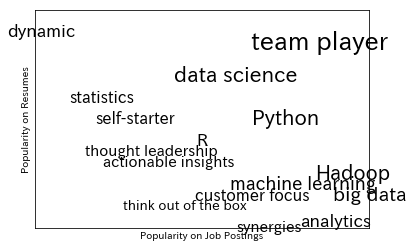

In [53]:
    from matplotlib import pyplot as plt
    
    def text_size(total: int) -> float:
        """equals 8 if total is 0, 28 if total is 200"""
        return 8 + total / 200 * 20
    
    for word, job_popularity, resume_popularity in data:
        plt.text(job_popularity, resume_popularity, word,
                 ha='center', va='center',
                 size=text_size(job_popularity + resume_popularity))
    plt.xlabel("Popularity on Job Postings")
    plt.ylabel("Popularity on Resumes")
    plt.axis([0, 100, 0, 100])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    
    plt.close()

In [54]:
    import re
    
    # This is not a great regex, but it works on our data.
    tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower())
                           for sentence in sentences]
    
    # Create a vocabulary (that is, a mapping word -> word_id) based on our text.
    vocab = Vocabulary(word
                       for sentence_words in tokenized_sentences
                       for word in sentence_words)
    
    from scratch.deep_learning import Tensor, one_hot_encode
    
    inputs: List[int] = []
    targets: List[Tensor] = []
    
    for sentence in tokenized_sentences:
        for i, word in enumerate(sentence):          # For each word
            for j in [i - 2, i - 1, i + 1, i + 2]:   # take the nearby locations
                if 0 <= j < len(sentence):           # that aren't out of bounds
                    nearby_word = sentence[j]        # and get those words.
    
                    # Add an input that's the original word_id
                    inputs.append(vocab.get_id(word))
    
                    # Add a target that's the one-hot-encoded nearby word
                    targets.append(vocab.one_hot_encode(nearby_word))
    
    
    # Model for learning word vectors

In [55]:
    from scratch.deep_learning import Sequential, Linear
    
    random.seed(0)
    EMBEDDING_DIM = 5  # seems like a good size
    
    # Define the embedding layer separately, so we can reference it.
    embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)
    
    model = Sequential([
        # Given a word (as a vector of word_ids), look up its embedding.
        embedding,
        # And use a linear layer to compute scores for "nearby words".
        Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
    ])
    
    
    # Train the word vector model
    
    from scratch.deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent
    
    loss = SoftmaxCrossEntropy()
    optimizer = GradientDescent(learning_rate=0.01)
    
    for epoch in range(100):
        epoch_loss = 0.0
        for input, target in zip(inputs, targets):
            predicted = model.forward(input)
            epoch_loss += loss.loss(predicted, target)
            gradient = loss.gradient(predicted, target)
            model.backward(gradient)
            optimizer.step(model)
        print(epoch, epoch_loss)            # Print the loss
        print(embedding.closest("black"))   # and also a few nearest words
        print(embedding.closest("slow"))    # so we can see what's being
        print(embedding.closest("car"))     # learned.
    
    
    

0 2970.156429387063
[(1.0, 'black'), (0.7927247753692507, 'blue'), (0.5911733314896048, 'cat'), (0.5716654981660781, 'the'), (0.3026892975059721, 'car')]
[(1.0, 'slow'), (0.8936272640937163, 'green'), (0.5272141409772461, '.'), (0.356013304388346, 'yellow'), (0.29982973123116025, 'blue')]
[(1.0, 'car'), (0.7030889033452818, 'cat'), (0.519105254858335, 'fast'), (0.4236692673437953, 'very'), (0.3848186865089063, 'quite')]
1 2865.855510833289
[(1.0, 'black'), (0.8076054877794636, 'blue'), (0.6112459000264461, 'cat'), (0.5676562111596322, 'the'), (0.3273307461476133, 'car')]
[(1.0, 'slow'), (0.8795208130766505, 'green'), (0.5675261127213351, '.'), (0.3624106663078739, 'yellow'), (0.3593451263736934, 'boat')]
[(1.0, 'car'), (0.7121322616680856, 'cat'), (0.49717481866583696, 'fast'), (0.4099921723101964, 'very'), (0.3655326707405854, 'quite')]
2 2815.035526656466
[(1.0, 'black'), (0.8240340241906855, 'blue'), (0.6310891601317347, 'cat'), (0.5448895203899405, 'the'), (0.3541498544488745, 'car

20 2504.5902126634855
[(1.0, 'black'), (0.957576053669443, 'blue'), (0.6754448002775352, 'yellow'), (0.6741016113281826, 'red'), (0.6370593374009472, 'cat')]
[(1.0, 'slow'), (0.8669876605786818, 'hard'), (0.7898461908470056, 'soft'), (0.7431142187795304, 'fast'), (0.6054838693034814, 'quite')]
[(1.0, 'car'), (0.8309314677594278, 'cat'), (0.41577966556459073, 'black'), (0.2950449738583089, 'bed'), (0.25992691986485333, 'blue')]
21 2498.7143878987954
[(1.0, 'black'), (0.9603082452264213, 'blue'), (0.6842899903173367, 'yellow'), (0.6819036185885786, 'red'), (0.6116210913792692, 'cat')]
[(1.0, 'slow'), (0.8684111458357192, 'hard'), (0.792082223341027, 'soft'), (0.7524810526902487, 'fast'), (0.6096628372717496, 'quite')]
[(1.0, 'car'), (0.8415691158802513, 'cat'), (0.40780015696694516, 'black'), (0.3138234920502818, 'bed'), (0.2526952060710574, 'blue')]
22 2493.3795337812226
[(1.0, 'black'), (0.9627876259396498, 'blue'), (0.6923235655936569, 'yellow'), (0.6887760594265789, 'red'), (0.607418

40 2445.435059175928
[(1.0, 'black'), (0.9830297405543987, 'blue'), (0.771540671956823, 'yellow'), (0.7326795304623553, 'red'), (0.7208372338967365, 'green')]
[(1.0, 'slow'), (0.880458120067408, 'hard'), (0.8195147526151283, 'fast'), (0.8130554630744775, 'soft'), (0.6193644198955738, 'quite')]
[(1.0, 'car'), (0.9239812945585655, 'cat'), (0.5021638639789027, 'bed'), (0.3327482008616001, 'black'), (0.32542179659037257, 'boat')]
41 2443.829764277178
[(1.0, 'black'), (0.9834644324611019, 'blue'), (0.7745235202523253, 'yellow'), (0.7332236523136183, 'red'), (0.724986156724789, 'green')]
[(1.0, 'slow'), (0.8802945185856285, 'hard'), (0.8210468443982984, 'fast'), (0.8132308941749018, 'soft'), (0.6173126954708407, 'quite')]
[(1.0, 'car'), (0.9253402525533306, 'cat'), (0.5085659333662396, 'bed'), (0.34445305702652873, 'boat'), (0.3299261215797454, 'black')]
42 2442.264295734095
[(1.0, 'black'), (0.9838638984531363, 'blue'), (0.7774574283509825, 'yellow'), (0.7336909797999465, 'red'), (0.7290090

60 2420.50423862855
[(1.0, 'black'), (0.9870290148847191, 'blue'), (0.8228741772663025, 'yellow'), (0.7865738299248013, 'green'), (0.7345677788547076, 'red')]
[(1.0, 'slow'), (0.8750945811724076, 'hard'), (0.8496294491509623, 'fast'), (0.8194974712260712, 'soft'), (0.5439055883980406, 'quite')]
[(1.0, 'car'), (0.9139163013482309, 'cat'), (0.6253693669470449, 'bed'), (0.5730029937205466, 'boat'), (0.27508395082824433, 'black')]
61 2419.6331284472003
[(1.0, 'black'), (0.9870424596759124, 'blue'), (0.8249545122095633, 'yellow'), (0.7891568805009261, 'green'), (0.7343896315578985, 'red')]
[(1.0, 'slow'), (0.8749303787807924, 'hard'), (0.851090086531167, 'fast'), (0.8200952535737444, 'soft'), (0.539061208339291, 'quite')]
[(1.0, 'car'), (0.9120436024931778, 'cat'), (0.6314955914156297, 'bed'), (0.5791069377111735, 'boat'), (0.27271064916324533, 'black')]
62 2418.7933809279984
[(1.0, 'black'), (0.987043013466362, 'blue'), (0.8269848641569836, 'yellow'), (0.7916876199885129, 'green'), (0.7341

80 2408.2135766837687
[(1.0, 'black'), (0.9854148512712754, 'blue'), (0.8552991079179565, 'yellow'), (0.8293099393854022, 'green'), (0.7292971266782381, 'red')]
[(1.0, 'slow'), (0.8768065331415691, 'hard'), (0.8751113979543328, 'fast'), (0.8349419301515192, 'soft'), (0.45485178519148356, 'quite')]
[(1.0, 'car'), (0.8785236145922348, 'cat'), (0.7356350107537116, 'bed'), (0.656620258923684, 'boat'), (0.24149321116016956, 'black')]
81 2407.8320561830847
[(1.0, 'black'), (0.9852615735169723, 'blue'), (0.8564474543662007, 'yellow'), (0.8310084376448683, 'green'), (0.7289484754345525, 'red')]
[(1.0, 'slow'), (0.8771346630632108, 'hard'), (0.8761277442755065, 'fast'), (0.8357997951621013, 'soft'), (0.4511801643389558, 'quite')]
[(1.0, 'car'), (0.8770581043441031, 'cat'), (0.7400342517800104, 'bed'), (0.6594825896382437, 'boat'), (0.2404320975323036, 'black')]
82 2407.4673830822285
[(1.0, 'black'), (0.9851043112165103, 'blue'), (0.8575554595630774, 'yellow'), (0.8326706354710252, 'green'), (0.

99 2403.2259775721222
[(1.0, 'black'), (0.9821293900663808, 'blue'), (0.870937253624594, 'yellow'), (0.8560680073921026, 'green'), (0.720997727387519, 'red')]
[(1.0, 'slow'), (0.8900872652719088, 'fast'), (0.8846955683864671, 'hard'), (0.8505709819185356, 'soft'), (0.3979688002551062, 'quite')]
[(1.0, 'car'), (0.8545578601895444, 'cat'), (0.7977433731597632, 'bed'), (0.6982593591613971, 'boat'), (0.228384707903377, 'black')]


In [57]:
    # Explore most similar words
    
    pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
             for w1 in vocab.w2i
             for w2 in vocab.w2i
             if w1 < w2]
    pairs.sort(reverse=True)
    print(pairs[:5])
    
    
    # Plot word vectors
    plt.close()

[(0.9948304450324577, 'bed', 'cat'), (0.9920899253848237, 'seems', 'was'), (0.9883988811665564, 'bed', 'boat'), (0.9821293900663808, 'black', 'blue'), (0.9709525703302306, 'green', 'red')]


dv: 43.206: 100%|██████████| 100/100 [00:00<00:00, 1301.78it/s]


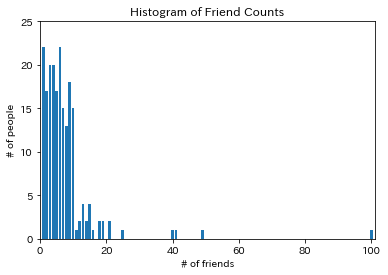

In [58]:
    from scratch.working_with_data import pca, transform
    import matplotlib.pyplot as plt
    
    # Extract the first two principal components and transform the word vectors
    components = pca(embedding.embeddings, 2)
    transformed = transform(embedding.embeddings, components)
    
    # Scatter the points (and make them white so they're "invisible")
    fig, ax = plt.subplots()
    ax.scatter(*zip(*transformed), marker='.', color='w')
    
    # Add annotations for each word at its transformed location
    for word, idx in vocab.w2i.items():
        ax.annotate(word, transformed[idx])
    
    # And hide the axes
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.show()
    
    
    
    plt.savefig('im/word_vectors')
    plt.gca().clear()
    plt.close()

## 21.7 リカレントニューラルネットワーク

## 21.8 事例:文字単位のRNN

In [63]:
    from bs4 import BeautifulSoup
    import requests
    
    url = "https://www.ycombinator.com/topcompanies/"
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    # We get the companies twice, so use a set comprehension to deduplicate.
    companies = list({b.text
                      for b in soup("b")
                      if "h4" in b.get("class", ())})
    
    # len(companies)を調査
    #print(len(companies))
    assert len(companies) == 102
    
    vocab = Vocabulary([c for company in companies for c in company])
    
    START = "^"
    STOP = "$"
    
    # We need to add them to the vocabulary too.
    vocab.add(START)
    vocab.add(STOP)
    
    HIDDEN_DIM = 32  # You should experiment with different sizes!
    
    rnn1 =  SimpleRnn(input_dim=vocab.size, hidden_dim=HIDDEN_DIM)
    rnn2 =  SimpleRnn(input_dim=HIDDEN_DIM, hidden_dim=HIDDEN_DIM)
    linear = Linear(input_dim=HIDDEN_DIM, output_dim=vocab.size)
    
    model = Sequential([
        rnn1,
        rnn2,
        linear
    ])
    

In [64]:
    from scratch.deep_learning import softmax
    
    def generate(seed: str = START, max_len: int = 50) -> str:
        rnn1.reset_hidden_state()  # Reset both hidden states.
        rnn2.reset_hidden_state()
        output = [seed]            # Start the output with the specified seed.
    
        # Keep going until we produce the STOP character or reach the max length
        while output[-1] != STOP and len(output) < max_len:
            # Use the last character as the input
            input = vocab.one_hot_encode(output[-1])
    
            # Generate scores using the model
            predicted = model.forward(input)
    
            # Convert them to probabilities and draw a random char_id
            probabilities = softmax(predicted)
            next_char_id = sample_from(probabilities)
    
            # Add the corresponding char to our output
            output.append(vocab.get_word(next_char_id))
    
        # Get rid of START and END characters and return the word.
        return ''.join(output[1:-1])
    
    loss = SoftmaxCrossEntropy()
    optimizer = Momentum(learning_rate=0.01, momentum=0.9)
    
    for epoch in range(300):
        random.shuffle(companies)  # Train in a different order each epoch.
        epoch_loss = 0             # Track the loss.
        for company in tqdm.tqdm(companies):
            rnn1.reset_hidden_state()  # Reset both hidden states.
            rnn2.reset_hidden_state()
            company = START + company + STOP   # Add START and STOP characters.
    
            # The rest is just our usual training loop, except that the inputs
            # and target are the one-hot-encoded previous and next characters.
            for prev, next in zip(company, company[1:]):
                input = vocab.one_hot_encode(prev)
                target = vocab.one_hot_encode(next)
                predicted = model.forward(input)
                epoch_loss += loss.loss(predicted, target)
                gradient = loss.gradient(predicted, target)
                model.backward(gradient)
                optimizer.step(model)
    
        # Each epoch print the loss and also generate a name
        print(epoch, epoch_loss, generate())
    
        # Turn down the learning rate for the last 100 epochs.
        # There's no principled reason for this, but it seems to work.
        if epoch == 200:
            optimizer.lr *= 0.1

  2%|▏         | 2/102 [00:00<00:05, 19.92it/s]

0 3426.4888098598954 


  1%|          | 1/102 [00:00<00:11,  8.52it/s]

1 3312.635096334229 es


  2%|▏         | 2/102 [00:00<00:07, 13.69it/s]

2 3241.7249946442626 UTqn(rri


  2%|▏         | 2/102 [00:00<00:05, 16.98it/s]

3 3181.703770351447 Coaeleih


  3%|▎         | 3/102 [00:00<00:03, 24.81it/s]

4 3121.829433330474 Rc a


  2%|▏         | 2/102 [00:00<00:05, 19.33it/s]

5 3088.7967647824034 Qeu


  3%|▎         | 3/102 [00:00<00:04, 22.91it/s]

6 3066.822001186605 S yeV dpA.o


  2%|▏         | 2/102 [00:00<00:07, 13.82it/s]

7 3041.28962207487 SUei


  3%|▎         | 3/102 [00:00<00:05, 17.18it/s]

8 3031.2068087636 Pepa 


  3%|▎         | 3/102 [00:00<00:04, 22.66it/s]

9 3012.6901115473343 EaxeaaGo


  2%|▏         | 2/102 [00:00<00:08, 12.39it/s]

10 2990.1638849359815 NaziIyocieeA


  2%|▏         | 2/102 [00:00<00:06, 15.18it/s]

11 2970.552077305597 Grgdr


  2%|▏         | 2/102 [00:00<00:09, 10.69it/s]

12 2949.235755704805 Ioopurrnqtt


  2%|▏         | 2/102 [00:00<00:08, 11.58it/s]

13 2935.647986878889 Sevofsbu


  2%|▏         | 2/102 [00:00<00:05, 17.81it/s]

14 2922.3512086951864 AeazDtv


  2%|▏         | 2/102 [00:00<00:07, 12.61it/s]

15 2909.0047395005986 Eemiin Intoke 


  2%|▏         | 2/102 [00:00<00:08, 12.06it/s]

16 2892.9425793611513 Luaey


  2%|▏         | 2/102 [00:00<00:06, 16.12it/s]

17 2876.8726648812426 nhir Pill


  2%|▏         | 2/102 [00:00<00:05, 17.21it/s]

18 2856.4007472380076 Patutxir


  3%|▎         | 3/102 [00:00<00:04, 23.89it/s]

19 2841.7701237725487 Sterten


  0%|          | 0/102 [00:00<?, ?it/s]

20 2821.8042483082695 GumtirooxD


  2%|▏         | 2/102 [00:00<00:07, 12.70it/s]

21 2805.3237432476394 FusThozliSisi


  2%|▏         | 2/102 [00:00<00:05, 19.08it/s]

22 2777.893105177771 Frsaa


  2%|▏         | 2/102 [00:00<00:07, 12.58it/s]

23 2762.4819639968314 MomiumevtiDo Sars


  2%|▏         | 2/102 [00:00<00:07, 13.88it/s]

24 2754.7180799031025 (imil


  2%|▏         | 2/102 [00:00<00:05, 18.72it/s]

25 2740.10214784756 AFgeOEi


  2%|▏         | 2/102 [00:00<00:06, 16.11it/s]

26 2717.753589019652 Pacr


  2%|▏         | 2/102 [00:00<00:09, 10.55it/s]

27 2715.2142358904803 Wepk


  2%|▏         | 2/102 [00:00<00:08, 11.98it/s]

28 2696.533181045782 Metnlett )Ngsn


  2%|▏         | 2/102 [00:00<00:07, 13.34it/s]

29 2696.1155031366475 QretAr


  2%|▏         | 2/102 [00:00<00:06, 14.83it/s]

30 2680.321354644952 Rorrorw


  3%|▎         | 3/102 [00:00<00:04, 24.33it/s]

31 2665.6426491604943 Ara Sktare


  2%|▏         | 2/102 [00:00<00:05, 17.54it/s]

32 2655.260702403053 Uctd GMenAwsrydovnti,


  3%|▎         | 3/102 [00:00<00:04, 20.03it/s]

33 2631.748736837226 Zetom


  2%|▏         | 2/102 [00:00<00:06, 15.18it/s]

34 2619.1643776434616 GretorP


  3%|▎         | 3/102 [00:00<00:05, 17.31it/s]

35 2602.914209641814 Gtaxratn


  2%|▏         | 2/102 [00:00<00:07, 13.07it/s]

36 2602.517826890247 Weopeotdo Inon


  3%|▎         | 3/102 [00:00<00:04, 21.38it/s]

37 2586.646310936082 Arrobommtncsut


  2%|▏         | 2/102 [00:00<00:07, 14.11it/s]

38 2565.6222841942354 Cos,lioreoneg


  2%|▏         | 2/102 [00:00<00:06, 16.01it/s]

39 2554.029845482384 FomoP


  2%|▏         | 2/102 [00:00<00:05, 18.61it/s]

40 2547.6505279389316 Tefs


  2%|▏         | 2/102 [00:00<00:06, 15.98it/s]

41 2531.246109446562 Lamta


  2%|▏         | 2/102 [00:00<00:05, 19.28it/s]

42 2513.0663955962864 Atpitsorormgc


  2%|▏         | 2/102 [00:00<00:06, 15.64it/s]

43 2493.5063404441994 Nrbirwot


  2%|▏         | 2/102 [00:00<00:06, 14.68it/s]

44 2480.617241688421 Steruar


  2%|▏         | 2/102 [00:00<00:05, 18.09it/s]

45 2470.5078853127598 GoXanptewny Inc


  2%|▏         | 2/102 [00:00<00:07, 13.11it/s]

46 2463.4370778923194 Motft


  2%|▏         | 2/102 [00:00<00:05, 17.29it/s]

47 2441.6953048516616 Girmord


  2%|▏         | 2/102 [00:00<00:05, 18.46it/s]

48 2429.6525990636605 Hutiry


  2%|▏         | 2/102 [00:00<00:05, 18.98it/s]

49 2412.507291780665 LoicBatl


  1%|          | 1/102 [00:00<00:11,  9.12it/s]

50 2394.962035090935 Fmenbire


  2%|▏         | 2/102 [00:00<00:06, 14.53it/s]

51 2393.055126434823 Rivebt


  2%|▏         | 2/102 [00:00<00:05, 19.10it/s]

52 2372.1571939314445 Inpnic


  2%|▏         | 2/102 [00:00<00:06, 15.67it/s]

53 2353.7026392816147 Elhyd


  1%|          | 1/102 [00:00<00:11,  9.00it/s]

54 2349.13184822502 FrgiyGore Cy Roceb


  2%|▏         | 2/102 [00:00<00:07, 13.39it/s]

55 2327.518983441483 Lelivice


  3%|▎         | 3/102 [00:00<00:04, 22.73it/s]

56 2306.286953340106 megtermeitaticy


  3%|▎         | 3/102 [00:00<00:04, 20.33it/s]

57 2287.4495479639745 Omapdq Xh Emucisiob


  3%|▎         | 3/102 [00:00<00:04, 22.65it/s]

58 2271.852526079574 RhvuberDorpgitor


  2%|▏         | 2/102 [00:00<00:05, 19.70it/s]

59 2259.3637443491248 DetaLest


  3%|▎         | 3/102 [00:00<00:06, 16.26it/s]

60 2234.2261884942545 Loophl


  3%|▎         | 3/102 [00:00<00:04, 22.08it/s]

61 2226.4425399207576 Costllird


  2%|▏         | 2/102 [00:00<00:05, 18.55it/s]

62 2217.362706410748 Inipgo


  3%|▎         | 3/102 [00:00<00:05, 18.29it/s]

63 2201.944062584722 Merpel


  3%|▎         | 3/102 [00:00<00:04, 20.55it/s]

64 2191.7701207321757 PuonMoS


  3%|▎         | 3/102 [00:00<00:04, 24.18it/s]

65 2169.251023648043 Nron


  3%|▎         | 3/102 [00:00<00:04, 22.25it/s]

66 2153.1114223751397 Mataralant


  3%|▎         | 3/102 [00:00<00:03, 26.43it/s]

67 2153.720946340912 Xabkiy


  3%|▎         | 3/102 [00:00<00:04, 23.96it/s]

68 2133.5543515754125 Guutorda Cy, Inc


  2%|▏         | 2/102 [00:00<00:05, 17.67it/s]

69 2105.6773287983415 Gupe Tle Eresgo (nc. Ze Dle..


  3%|▎         | 3/102 [00:00<00:05, 18.20it/s]

70 2079.7836953151605 Cener


  3%|▎         | 3/102 [00:00<00:03, 26.74it/s]

71 2079.9041072256955 Stanry Eecevaond.


  3%|▎         | 3/102 [00:00<00:04, 23.15it/s]

72 2085.21192050219 Doondl


  3%|▎         | 3/102 [00:00<00:04, 21.72it/s]

73 2042.246720897676 RexBhibe


  2%|▏         | 2/102 [00:00<00:05, 19.74it/s]

74 2046.3338571081329 Etvabyztity


  2%|▏         | 2/102 [00:00<00:05, 18.56it/s]

75 2030.6381365980606 Hadkon


  3%|▎         | 3/102 [00:00<00:05, 17.91it/s]

76 2003.1211392168536 Ghemel


  1%|          | 1/102 [00:00<00:10,  9.96it/s]

77 2010.916976042532 Rozer


  3%|▎         | 3/102 [00:00<00:04, 24.68it/s]

78 1984.7357552506446 Poonorda moon


  2%|▏         | 2/102 [00:00<00:05, 18.42it/s]

79 1978.5730385480963 Huetten Sice


  2%|▏         | 2/102 [00:00<00:05, 19.82it/s]

80 1934.3307070409805 CnufDo


  3%|▎         | 3/102 [00:00<00:03, 26.94it/s]

81 1948.4631546762191 Epqicle,s


  3%|▎         | 3/102 [00:00<00:06, 16.35it/s]

82 1916.6733584639667 Re Tomu


  1%|          | 1/102 [00:00<00:10,  9.83it/s]

83 1901.2766172013019 Giveliut


  2%|▏         | 2/102 [00:00<00:07, 13.52it/s]

84 1907.9563535829113 Pavesnanel


  3%|▎         | 3/102 [00:00<00:04, 20.88it/s]

85 1884.8282046274676 Cipbye Cacent


  2%|▏         | 2/102 [00:00<00:07, 13.65it/s]

86 1861.9323180767171 Swexu


  2%|▏         | 2/102 [00:00<00:07, 14.07it/s]

87 1856.8693830814072 Clex


  3%|▎         | 3/102 [00:00<00:04, 23.00it/s]

88 1831.2860784754928 Iliem


  3%|▎         | 3/102 [00:00<00:04, 22.58it/s]

89 1837.3684965014143 Wabtiblasy


  3%|▎         | 3/102 [00:00<00:03, 26.98it/s]

90 1836.7222205407184 Qogpe


  3%|▎         | 3/102 [00:00<00:04, 22.65it/s]

91 1828.2584163120468 Botx


  2%|▏         | 2/102 [00:00<00:05, 16.79it/s]

92 1811.1666664998104 Sxhliy


  2%|▏         | 2/102 [00:00<00:06, 14.29it/s]

93 1807.788543358389 PoorVaxhtire


  2%|▏         | 2/102 [00:00<00:05, 18.94it/s]

94 1769.5570604459933 Thelid


  3%|▎         | 3/102 [00:00<00:04, 21.87it/s]

95 1786.2957864966418 Guvio


  2%|▏         | 2/102 [00:00<00:05, 19.70it/s]

96 1770.621787553574 Infaby Imh


  2%|▏         | 2/102 [00:00<00:05, 19.29it/s]

97 1721.0452235111018 Clearom)


  3%|▎         | 3/102 [00:00<00:05, 19.49it/s]

98 1734.0219536185175 Sesm


  2%|▏         | 2/102 [00:00<00:06, 16.29it/s]

99 1707.4744856850236 Critbr Cocett


  3%|▎         | 3/102 [00:00<00:06, 16.14it/s]

100 1706.3796789985206 EirtO


  2%|▏         | 2/102 [00:00<00:06, 16.19it/s]

101 1710.908709835264 Ryunserdlhang


  2%|▏         | 2/102 [00:00<00:05, 18.86it/s]

102 1719.057093311967 Neeawink


  2%|▏         | 2/102 [00:00<00:06, 15.45it/s]

103 1693.049091620757 Inflani


  2%|▏         | 2/102 [00:00<00:07, 13.11it/s]

104 1654.2473954039956 Gisegy,


  3%|▎         | 3/102 [00:00<00:04, 22.79it/s]

105 1693.8429275584108 InoP


  3%|▎         | 3/102 [00:00<00:04, 20.35it/s]

106 1633.0084829803272 Invnip


  2%|▏         | 2/102 [00:00<00:06, 15.07it/s]

107 1615.94482723601 Brex


  2%|▏         | 2/102 [00:00<00:05, 17.07it/s]

108 1627.5592712538817 Fodao


  3%|▎         | 3/102 [00:00<00:04, 20.53it/s]

109 1647.9441109683721 Thebdob


  2%|▏         | 2/102 [00:00<00:05, 19.85it/s]

110 1674.9693694205823 Paiwn


  3%|▎         | 3/102 [00:00<00:04, 22.68it/s]

111 1654.6051303091722 Ple


  3%|▎         | 3/102 [00:00<00:03, 28.13it/s]

112 1622.0491375899278 Atutity


  2%|▏         | 2/102 [00:00<00:07, 12.93it/s]

113 1596.2502736487656 Gustalid


  3%|▎         | 3/102 [00:00<00:04, 20.22it/s]

114 1557.8902011830066 Gliptq


  3%|▎         | 3/102 [00:00<00:04, 22.07it/s]

115 1577.3805949758016 Prex


  3%|▎         | 3/102 [00:00<00:04, 24.26it/s]

116 1529.208401228096 GOAlit ETc.anc


  3%|▎         | 3/102 [00:00<00:03, 25.30it/s]

117 1574.2784918704397 Muptu


  2%|▏         | 2/102 [00:00<00:06, 15.61it/s]

118 1547.923118661453 Shrimbaomorxhirt


  2%|▏         | 2/102 [00:00<00:05, 19.83it/s]

119 1569.836002429006 Grip


  3%|▎         | 3/102 [00:00<00:05, 16.70it/s]

120 1531.5849172084834 Leand


  2%|▏         | 2/102 [00:00<00:09, 10.49it/s]

121 1541.99352190688 Xacettot


  2%|▏         | 2/102 [00:00<00:05, 19.18it/s]

122 1511.7255756351353 SFrit


  3%|▎         | 3/102 [00:00<00:04, 22.39it/s]

123 1489.0928729876293 Acrire


  2%|▏         | 2/102 [00:00<00:07, 12.86it/s]

124 1483.6650024178946 Sabticac


  2%|▏         | 2/102 [00:00<00:07, 12.93it/s]

125 1500.5209331144597 Epitble


  2%|▏         | 2/102 [00:00<00:05, 18.01it/s]

126 1470.2932115014708 Xaderp


  2%|▏         | 2/102 [00:00<00:07, 12.70it/s]

127 1465.2880466674974 Migetrada Inc


  2%|▏         | 2/102 [00:00<00:06, 14.42it/s]

128 1524.7945022363945 Wessh


  2%|▏         | 2/102 [00:00<00:06, 16.37it/s]

129 1472.8649749757774 Fitfabel


  2%|▏         | 2/102 [00:00<00:06, 16.10it/s]

130 1418.573865774996 Atipd


  2%|▏         | 2/102 [00:00<00:07, 13.53it/s]

131 1468.7530658354287 Ginppime Inc


  3%|▎         | 3/102 [00:00<00:03, 28.68it/s]

132 1445.336139694632 Nory


  2%|▏         | 2/102 [00:00<00:06, 15.35it/s]

133 1433.4138351854253 Druisorpaoranc  Educatios


  2%|▏         | 2/102 [00:00<00:06, 14.64it/s]

134 1410.0425926452276 Prex


  3%|▎         | 3/102 [00:00<00:03, 25.05it/s]

135 1386.1921035978107 Brastz CronrTaGort


  3%|▎         | 3/102 [00:00<00:04, 20.76it/s]

136 1424.6224475670142 Lriipd


  2%|▏         | 2/102 [00:00<00:05, 18.37it/s]

137 1462.0441737221522 Wellolade


  2%|▏         | 2/102 [00:00<00:08, 11.32it/s]

138 1432.0799378828292 Ze Tt Xtocktiow


  2%|▏         | 2/102 [00:00<00:06, 15.83it/s]

139 1465.5312812812604 Spris


  1%|          | 1/102 [00:00<00:10,  9.96it/s]

140 1477.9185330586802 Wacetrelaont


  2%|▏         | 2/102 [00:00<00:06, 14.33it/s]

141 1480.0567617051788 Qurubobnhosd


  2%|▏         | 2/102 [00:00<00:06, 15.26it/s]

142 1390.8268575287136 PewecorkDost


  3%|▎         | 3/102 [00:00<00:04, 22.21it/s]

143 1442.1642031859433 BroxBrort


  2%|▏         | 2/102 [00:00<00:08, 11.91it/s]

144 1424.6840014476945 Goyper


  2%|▏         | 2/102 [00:00<00:05, 18.35it/s]

145 1415.0607211721317 Fle IoCa


  2%|▏         | 2/102 [00:00<00:07, 13.90it/s]

146 1428.9051963119239 Rimpu


  2%|▏         | 2/102 [00:00<00:09, 10.60it/s]

147 1440.4281127222953 Eayquter


  2%|▏         | 2/102 [00:00<00:06, 15.80it/s]

148 1456.5659059811421 Frontoos


  3%|▎         | 3/102 [00:00<00:03, 25.31it/s]

149 1381.9920346562856 Fuerode Id


  3%|▎         | 3/102 [00:00<00:04, 22.96it/s]

150 1334.2544542989253 Necfron Di .oberTDh


  2%|▏         | 2/102 [00:00<00:05, 18.14it/s]

151 1371.353000215029 Zienchash


  3%|▎         | 3/102 [00:00<00:03, 29.20it/s]

152 1364.294589901543 Omut


  3%|▎         | 3/102 [00:00<00:05, 18.80it/s]

153 1409.1632610939812 HePmedv


  2%|▏         | 2/102 [00:00<00:07, 13.04it/s]

154 1398.6646315954717 ShigBo


  3%|▎         | 3/102 [00:00<00:05, 18.29it/s]

155 1393.1603258890332 Unblitan Stangg


  3%|▎         | 3/102 [00:00<00:04, 22.60it/s]

156 1346.3812341209493 Pemcqox


  3%|▎         | 3/102 [00:00<00:03, 25.28it/s]

157 1336.1434212245597 Scrisglanc


  2%|▏         | 2/102 [00:00<00:06, 16.65it/s]

158 1327.695750871328 Eiuient


  3%|▎         | 3/102 [00:00<00:04, 21.92it/s]

159 1314.836403174732 Scanel


  2%|▏         | 2/102 [00:00<00:06, 14.36it/s]

160 1369.5300957180502 Cutbate


  3%|▎         | 3/102 [00:00<00:05, 17.10it/s]

161 1388.563760874512 Raxpaniy


  2%|▏         | 2/102 [00:00<00:07, 13.66it/s]

162 1396.285081614207 Ttgli


  3%|▎         | 3/102 [00:00<00:06, 15.28it/s]

163 1331.1047923086214 PrearTa Bion


  2%|▏         | 2/102 [00:00<00:05, 16.69it/s]

164 1312.738201443211 Dooporkuird


  4%|▍         | 4/102 [00:00<00:03, 28.81it/s]

165 1349.2298553045 Doird


  3%|▎         | 3/102 [00:00<00:03, 27.50it/s]

166 1370.8911278896987 AirgDameass


  2%|▏         | 2/102 [00:00<00:08, 11.19it/s]

167 1320.0157028538645 AtribpAnudvinc


  2%|▏         | 2/102 [00:00<00:07, 13.82it/s]

168 1328.5328044416813 Ohntt zBord xy Xit


  2%|▏         | 2/102 [00:00<00:06, 16.45it/s]

169 1333.138208039032 Lapie


  3%|▎         | 3/102 [00:00<00:04, 20.52it/s]

170 1310.3757481850264 Standardy


  2%|▏         | 2/102 [00:00<00:05, 19.34it/s]

171 1323.1816544001638 Lappl Ile


  1%|          | 1/102 [00:00<00:11,  8.89it/s]

172 1383.5031238837933 WeOBit


  2%|▏         | 2/102 [00:00<00:05, 19.19it/s]

173 1430.0314333718059 WeroDort


  2%|▏         | 2/102 [00:00<00:06, 15.72it/s]

174 1388.7031507447434 Eautoc


  2%|▏         | 2/102 [00:00<00:05, 16.85it/s]

175 1394.3295860099136 Zeroy Enflinbani


  3%|▎         | 3/102 [00:00<00:04, 23.97it/s]

176 1388.3115521292057 Fipice Inc


  2%|▏         | 2/102 [00:00<00:05, 18.46it/s]

177 1358.7525211780965 Anbazel


  2%|▏         | 2/102 [00:00<00:05, 17.14it/s]

178 1344.476205439761 Lax


  3%|▎         | 3/102 [00:00<00:05, 19.18it/s]

179 1343.5429091379567 Patue


  3%|▎         | 3/102 [00:00<00:05, 18.46it/s]

180 1311.0722884367356 Lairet


  2%|▏         | 2/102 [00:00<00:07, 13.49it/s]

181 1332.2568937855426 Leviy Inplutn


  3%|▎         | 3/102 [00:00<00:04, 23.47it/s]

182 1218.153036781653 Coc


  3%|▎         | 3/102 [00:00<00:04, 23.45it/s]

183 1265.6407126711003 Meudotemtgl


  3%|▎         | 3/102 [00:00<00:05, 16.89it/s]

184 1252.7381376204455 Vatxermort Ss


  2%|▏         | 2/102 [00:00<00:06, 15.32it/s]

185 1352.2612591627667 Pagdue


  3%|▎         | 3/102 [00:00<00:04, 24.34it/s]

186 1435.2143983640385 Scruom


  2%|▏         | 2/102 [00:00<00:05, 16.71it/s]

187 1326.4988577690704 Proxirper


  2%|▏         | 2/102 [00:00<00:05, 16.74it/s]

188 1347.4065837234857 Sebme


  3%|▎         | 3/102 [00:00<00:04, 20.23it/s]

189 1248.917952160895 Stripe


  3%|▎         | 3/102 [00:00<00:04, 22.92it/s]

190 1347.185434559184 Welion Enerer


  2%|▏         | 2/102 [00:00<00:05, 17.70it/s]

191 1322.46406442161 Omda


  3%|▎         | 3/102 [00:00<00:05, 18.24it/s]

192 1330.064205697889 Stacdodars


  2%|▏         | 2/102 [00:00<00:05, 19.73it/s]

193 1388.0935167063628 ClearTanel


  2%|▏         | 2/102 [00:00<00:06, 16.14it/s]

194 1326.0015305830411 Famfe


  3%|▎         | 3/102 [00:00<00:04, 22.01it/s]

195 1251.6078636339637 Fitase


  3%|▎         | 3/102 [00:00<00:04, 23.45it/s]

196 1268.3264012816776 Heapd


  3%|▎         | 3/102 [00:00<00:03, 25.23it/s]

197 1282.9740013687467 Iron


  2%|▏         | 2/102 [00:00<00:06, 15.81it/s]

198 1254.2455597821759 SthoxDrt


  2%|▏         | 2/102 [00:00<00:06, 16.46it/s]

199 1180.3662681895128 AlgoxDhtor


  3%|▎         | 3/102 [00:00<00:04, 22.36it/s]

200 1291.5737217113647 Ne Grongn An Drb


  2%|▏         | 2/102 [00:00<00:05, 17.82it/s]

201 1101.3400852346851 Beverth


  2%|▏         | 2/102 [00:00<00:05, 19.87it/s]

202 976.5884814690742 Meder


  3%|▎         | 3/102 [00:00<00:03, 29.02it/s]

203 921.4799158370556 Tcrtititide


  1%|          | 1/102 [00:00<00:10,  9.34it/s]

204 895.4634480694853 Py x


  2%|▏         | 2/102 [00:00<00:08, 12.47it/s]

205 869.4759822932144 Peviolaonc


  3%|▎         | 3/102 [00:00<00:04, 23.45it/s]

206 858.1101634400994 Coinbase


  3%|▎         | 3/102 [00:00<00:03, 25.57it/s]

207 847.5506780682106 Videcsate


  3%|▎         | 3/102 [00:00<00:05, 18.16it/s]

208 839.8563347423305 Zelloni


  3%|▎         | 3/102 [00:00<00:03, 24.92it/s]

209 827.6909881142045 EasyPost


  3%|▎         | 3/102 [00:00<00:04, 23.90it/s]

210 827.8542412687584 TcOGronbBes


  3%|▎         | 3/102 [00:00<00:04, 20.98it/s]

211 817.6708271603254 Gusto


  2%|▏         | 2/102 [00:00<00:05, 17.03it/s]

212 814.4050590496686 LyaGdess


  3%|▎         | 3/102 [00:00<00:04, 23.13it/s]

213 810.3972889639887 Srauer


  3%|▎         | 3/102 [00:00<00:04, 24.57it/s]

214 808.6923290382923 GoCacqux


  3%|▎         | 3/102 [00:00<00:04, 20.44it/s]

215 799.6694536682618 WelloSign (acquired S


  2%|▏         | 2/102 [00:00<00:08, 12.22it/s]

216 800.5221598336743 Intlux


  3%|▎         | 3/102 [00:00<00:03, 26.35it/s]

217 797.6444780922192 Rianbacg


  3%|▎         | 3/102 [00:00<00:03, 28.09it/s]

218 790.3495429301979 People.ai


  2%|▏         | 2/102 [00:00<00:05, 19.95it/s]

219 787.0589486387126 Fatthe Edx.ordh Cy,iba


  2%|▏         | 2/102 [00:00<00:06, 14.99it/s]

220 782.13428630184 He Tornb


  2%|▏         | 2/102 [00:00<00:06, 16.48it/s]

221 778.641584161971 Ficeres


  3%|▎         | 3/102 [00:00<00:04, 24.71it/s]

222 778.8565200314035 ShipBobDoorDambnty, Ench


  2%|▏         | 2/102 [00:00<00:07, 13.12it/s]

223 776.51370934402 Shiplobn (oble


  3%|▎         | 3/102 [00:00<00:05, 17.89it/s]

224 771.872288572276 Nybaum


  4%|▍         | 4/102 [00:00<00:03, 31.24it/s]

225 769.3215668896333 Srapiec


  3%|▎         | 3/102 [00:00<00:04, 20.19it/s]

226 765.9062084637142 Za (oty.y wy .eblasty


  2%|▏         | 2/102 [00:00<00:05, 17.09it/s]

227 765.6111694785039 Tpitudic


  3%|▎         | 3/102 [00:00<00:04, 22.33it/s]

228 763.3216663261088 WeroDe


  3%|▎         | 3/102 [00:00<00:04, 21.84it/s]

229 762.5095884909623 Frinb


  3%|▎         | 3/102 [00:00<00:04, 21.97it/s]

230 762.0515659832575 People.ai


  3%|▎         | 3/102 [00:00<00:04, 23.72it/s]

231 758.5823545307954 SFOpwen


  2%|▏         | 2/102 [00:00<00:05, 17.69it/s]

232 759.4848866774043 Heave


  3%|▎         | 3/102 [00:00<00:05, 19.41it/s]

233 751.6933719085308 Weswrer


  3%|▎         | 3/102 [00:00<00:03, 25.03it/s]

234 753.0878151451651 Meesho


  3%|▎         | 3/102 [00:00<00:03, 25.39it/s]

235 751.2693461574278 Rabe Inc.ess


  3%|▎         | 3/102 [00:00<00:04, 24.30it/s]

236 752.836169082592 People.ai


  3%|▎         | 3/102 [00:00<00:04, 23.58it/s]

237 751.2985287349306 Brex


  3%|▎         | 3/102 [00:00<00:05, 17.63it/s]

238 742.9712882391918 GitPob


  3%|▎         | 3/102 [00:00<00:04, 22.65it/s]

239 744.9234326708745 Meesho


  2%|▏         | 2/102 [00:00<00:06, 16.58it/s]

240 742.3371777981897 Stonm


  2%|▏         | 2/102 [00:00<00:08, 11.51it/s]

241 739.7378443290686 AlgoGt


  2%|▏         | 2/102 [00:00<00:07, 13.17it/s]

242 739.0395249760548 GoCagluinc


  3%|▎         | 3/102 [00:00<00:04, 24.14it/s]

243 738.0025912174107 HeroDovelive Idhoonc


  3%|▎         | 3/102 [00:00<00:04, 24.42it/s]

244 736.5675007394179 Grint


  3%|▎         | 3/102 [00:00<00:04, 23.71it/s]

245 738.0260672413852 pigetird


  2%|▏         | 2/102 [00:00<00:06, 15.04it/s]

246 734.7122166744446 Rescale


  3%|▎         | 3/102 [00:00<00:04, 22.21it/s]

247 734.1123402534785 SFOMbhlior


  3%|▎         | 3/102 [00:00<00:03, 26.23it/s]

248 737.4102536303218 Mems


  3%|▎         | 3/102 [00:00<00:05, 17.07it/s]

249 737.1561315194793 Heam


  2%|▏         | 2/102 [00:00<00:06, 16.02it/s]

250 739.815299950677 GitPob


  2%|▏         | 2/102 [00:00<00:07, 13.10it/s]

251 737.616131360317 Weliornt


  3%|▎         | 3/102 [00:00<00:03, 26.14it/s]

252 741.7075706029718 Flutume


  0%|          | 0/102 [00:00<?, ?it/s]

253 737.6220186134806 Mendhirm


  2%|▏         | 2/102 [00:00<00:06, 16.36it/s]

254 737.4590310746429 The ADifb


  4%|▍         | 4/102 [00:00<00:03, 31.82it/s]

255 735.185259269128 Remsqlent


  3%|▎         | 3/102 [00:00<00:04, 23.76it/s]

256 741.061006319137 GOAT


  0%|          | 0/102 [00:00<?, ?it/s]

257 738.0253431230778 Notion Ineo


  2%|▏         | 2/102 [00:00<00:05, 19.05it/s]

258 739.2327240779205 North


  2%|▏         | 2/102 [00:00<00:05, 19.43it/s]

259 735.6108721228169 Me Tote


  2%|▏         | 2/102 [00:00<00:07, 13.37it/s]

260 738.2426995821177 FhvetorD


  3%|▎         | 3/102 [00:00<00:04, 23.79it/s]

261 737.567027269607 Clencarklirke


  2%|▏         | 2/102 [00:00<00:06, 14.91it/s]

262 733.3800199447977 Sripe


  3%|▎         | 3/102 [00:00<00:03, 24.93it/s]

263 732.6099969545045 Ramberme Initgo


  2%|▏         | 2/102 [00:00<00:06, 15.77it/s]

264 728.990582811992 Ratterpororb


  3%|▎         | 3/102 [00:00<00:03, 25.31it/s]

265 728.6791049111089 Guesty


  3%|▎         | 3/102 [00:00<00:04, 23.47it/s]

266 726.7973354800362 Opticitinpipelyalenc


  3%|▎         | 3/102 [00:00<00:05, 17.74it/s]

267 728.1078993426476 Leverthl


  2%|▏         | 2/102 [00:00<00:06, 15.61it/s]

268 719.7781048130574 Coduimdy, Cody Grty Ineriarardl btesviimme


  3%|▎         | 3/102 [00:00<00:05, 17.77it/s]

269 722.4173961328439 Gcing


  2%|▏         | 2/102 [00:00<00:07, 14.10it/s]

270 724.0051424956704 Notable


  3%|▎         | 3/102 [00:00<00:03, 27.55it/s]

271 719.3191669425825 Tnanbare


  2%|▏         | 2/102 [00:00<00:07, 13.53it/s]

272 720.6647424401845 Nourlud


  3%|▎         | 3/102 [00:00<00:05, 17.20it/s]

273 720.4368577205394 Heronabeerwomamesdanserkon Inc.


  0%|          | 0/102 [00:00<?, ?it/s]

274 720.1955847459856 Ginkgo BitLated


  2%|▏         | 2/102 [00:00<00:05, 18.98it/s]

275 717.4727169103214 Frutt


  3%|▎         | 3/102 [00:00<00:05, 17.91it/s]

276 720.307488346142 Cruigell


  3%|▎         | 3/102 [00:00<00:05, 17.39it/s]

277 718.9202933173484 Resdermd


  3%|▎         | 3/102 [00:00<00:05, 17.14it/s]

278 718.6833168618276 Miapdorwecangni


  2%|▏         | 2/102 [00:00<00:06, 16.30it/s]

279 713.2038777858489 Tpioborpuer


  3%|▎         | 3/102 [00:00<00:04, 24.08it/s]

280 718.168250115146 HeoT


  3%|▎         | 3/102 [00:00<00:06, 16.04it/s]

281 717.9972247230808 Atrewpu


  1%|          | 1/102 [00:00<00:17,  5.82it/s]

282 716.1164812094063 Atom


  3%|▎         | 3/102 [00:00<00:03, 26.60it/s]

283 719.4672417719901 Hellogn (goli Eareue


  3%|▎         | 3/102 [00:00<00:05, 18.23it/s]

284 717.1192791912816 Boor


  2%|▏         | 2/102 [00:00<00:05, 16.96it/s]

285 714.6474036056269 Resfarel


  3%|▎         | 3/102 [00:00<00:03, 24.92it/s]

286 714.3522817528369 Fuvetini


  3%|▎         | 3/102 [00:00<00:04, 23.08it/s]

287 716.0414202906395 Atriue


  3%|▎         | 3/102 [00:00<00:04, 21.04it/s]

288 712.3973039973586 Pecagl


  2%|▏         | 2/102 [00:00<00:06, 14.75it/s]

289 713.5342399703718 Futuime


  3%|▎         | 3/102 [00:00<00:04, 23.22it/s]

290 708.9729673649556 Peoply


  2%|▏         | 2/102 [00:00<00:07, 13.48it/s]

291 705.5707543168793 Mewwierda (vace


  3%|▎         | 3/102 [00:00<00:03, 26.93it/s]

292 710.3960663750574 Snapdo Aduclit


  3%|▎         | 3/102 [00:00<00:04, 23.08it/s]

293 710.2807664954879 Doompcetihl


  2%|▏         | 2/102 [00:00<00:05, 18.12it/s]

294 703.6855353954884 Spamatinpermn Earan


  3%|▎         | 3/102 [00:00<00:03, 25.58it/s]

295 704.6905501571603 AtxPoomcixkrim


  2%|▏         | 2/102 [00:00<00:06, 16.56it/s]

296 710.2488110223808 Front


  2%|▏         | 2/102 [00:00<00:06, 15.78it/s]

297 703.4612034992444 Atrium


  2%|▏         | 2/102 [00:00<00:06, 16.18it/s]

298 705.7604434588209 Athelars


100%|██████████| 102/102 [00:05<00:00, 19.54it/s]

299 706.7953639628312 Rappi
